In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# setting dimension for plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
data=pd.read_csv(r"cars_sampled.csv")
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
#creating a copy of dataframe
cars=data.copy()

In [5]:
#structure of data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
cars.describe(include="O")

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,50001,50001,50001,50001,50001,44813,47177,47243,45498,50001,40285,50001,50001
unique,12039,38766,2,2,2,8,2,248,7,40,2,75,10413
top,3/4/2016 16:57,BMW_318i,private,offer,test,limousine,manual,golf,petrol,volkswagen,no,3/4/2016 0:00,6/4/2016 5:46
freq,15,90,49999,49998,25869,13041,36732,3972,30214,10646,35337,1976,107


In [8]:
cars["offerType"].value_counts()

offer      49998
request        3
Name: offerType, dtype: int64

In [9]:
print(np.unique(cars["offerType"]))

['offer' 'request']


In [10]:
#Droping unwanted columns
col=['name','dateCrawled','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [11]:
#removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)

In [12]:
#data cleaning
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5181
yearOfRegistration        0
gearbox                2813
powerPS                   0
model                  2751
kilometer                 0
monthOfRegistration       0
fuelType               4493
brand                     0
notRepairedDamage      9705
dateCreated               0
dtype: int64

In [13]:
#variable year of registration
yearwise_count=cars["yearOfRegistration"].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    15
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

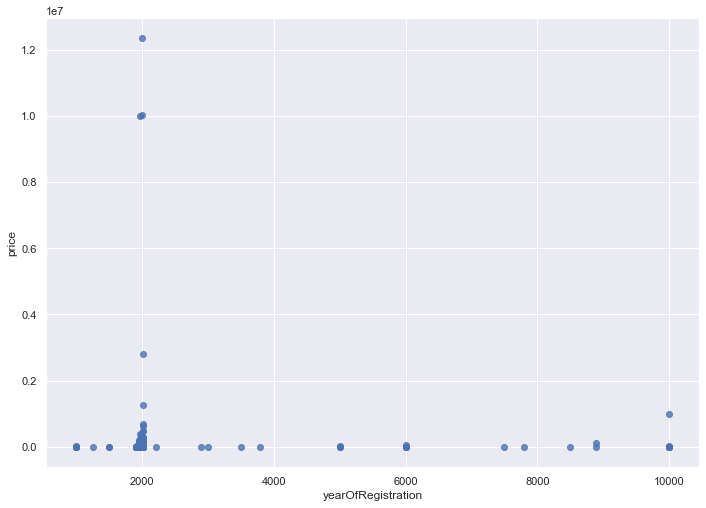

In [14]:
sum(cars["yearOfRegistration"]>2018)
sum(cars["yearOfRegistration"]<1950)
sns.regplot(x='yearOfRegistration',y='price',scatter = True,
            fit_reg= False,data=cars)

In [15]:
#variable price
price_counts=cars['price'].value_counts().sort_index()
price_counts

0           1447
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

C:\Users\NIHAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

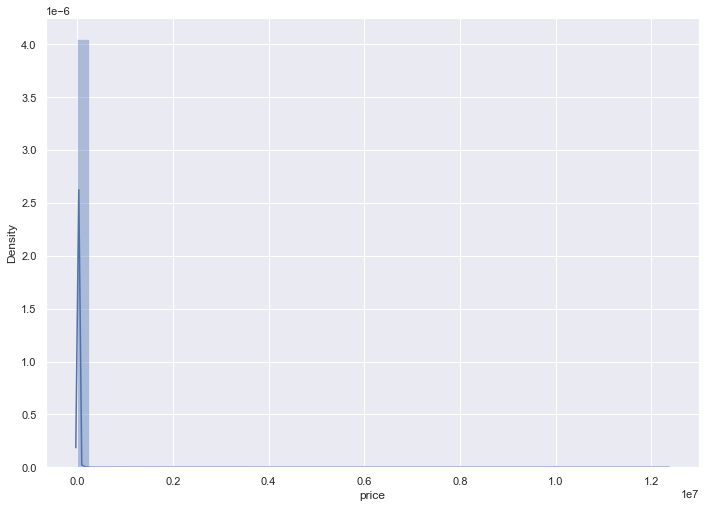

In [16]:
sns.distplot(cars['price'])

C:\Users\NIHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

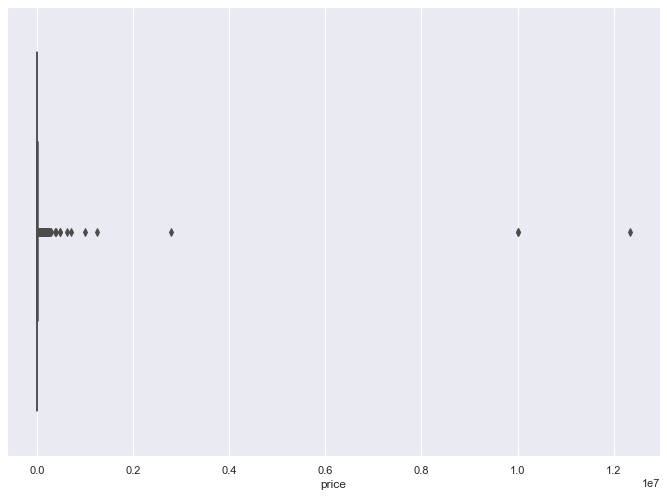

In [17]:
sns.boxplot(cars['price'])

In [18]:
sum(cars["price"]>150000)
sum(cars['price']<100)

1780

In [19]:
#variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
power_count

0        5589
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

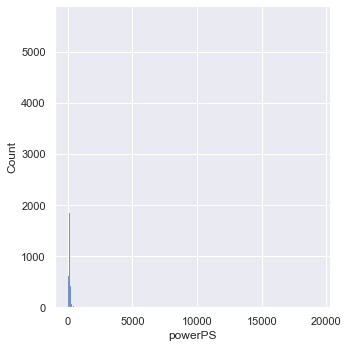

In [20]:
sns.displot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

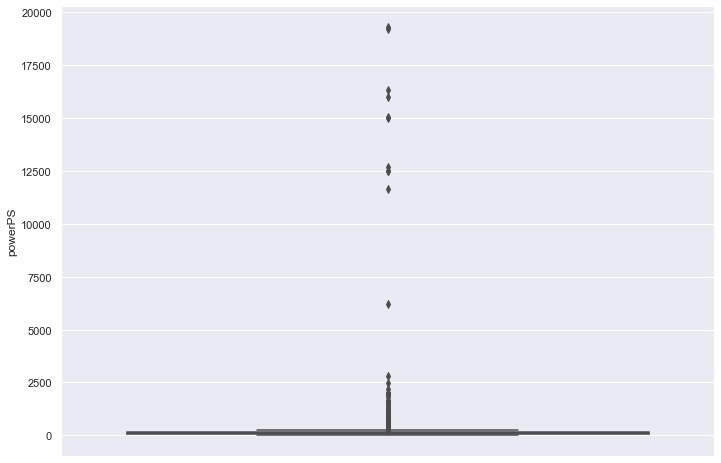

In [21]:
sns.boxplot(y=cars["powerPS"])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

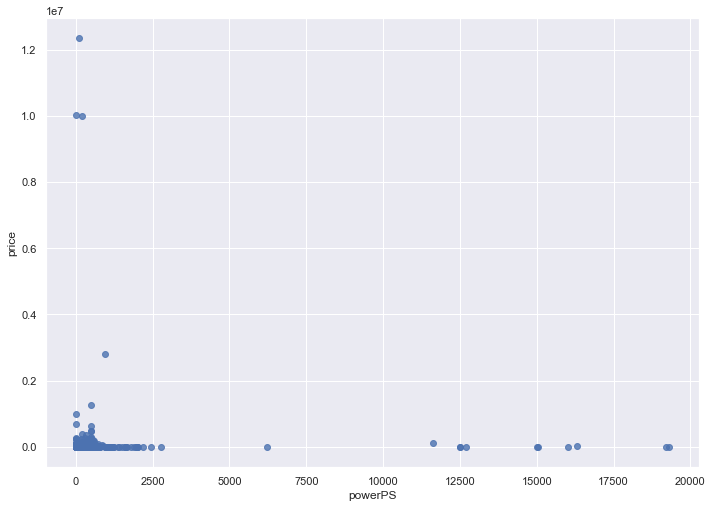

In [22]:
sns.regplot(x='powerPS',y='price',scatter=True,
           fit_reg=False,data=cars)

In [23]:
sum(cars['powerPS']>500)
sum(cars["powerPS"]<10)

5621

In [24]:
# working range of data 

In [25]:
cars=cars[(cars.yearOfRegistration<=2018)
         &(cars.yearOfRegistration>=1950)
         &(cars.price>=100)
         &(cars.price<=150000)
         &(cars.powerPS>=10)
         &(cars.powerPS<=500)]
# ~ 6700 records are dropped

In [26]:
cars["monthOfRegistration"]/=12

In [27]:
#creating new variable Age by adding yearOf registration and month of registration
cars["Age"]=(2018-cars["yearOfRegistration"])+cars["monthOfRegistration"]
cars["Age"]=round(cars["Age"],2)
cars["Age"].describe()

count    43018.000000
mean        14.864021
std          7.086825
min          0.000000
25%         10.250000
50%         14.830000
75%         19.170000
max         67.750000
Name: Age, dtype: float64

In [28]:
#droping year of registration n month of registration
cars=cars.drop(columns=["yearOfRegistration","monthOfRegistration"],axis=1)

<AxesSubplot:xlabel='Age', ylabel='Age'>

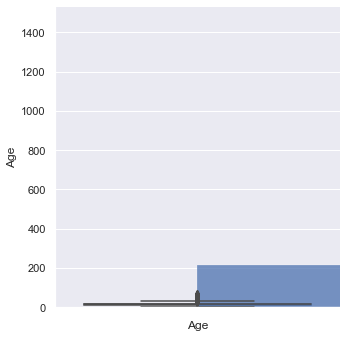

In [29]:
#visualinzing parameters
#Age
sns.displot(cars['Age'])
sns.boxplot(y=cars["Age"])

<AxesSubplot:xlabel='price', ylabel='price'>

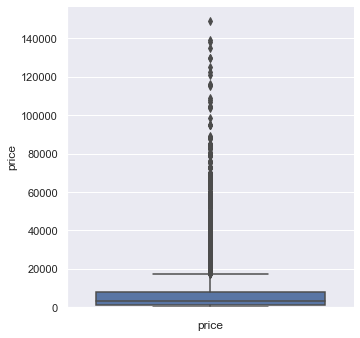

In [30]:
#price
sns.displot(cars['price'])
sns.boxplot(y=cars["price"])

<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

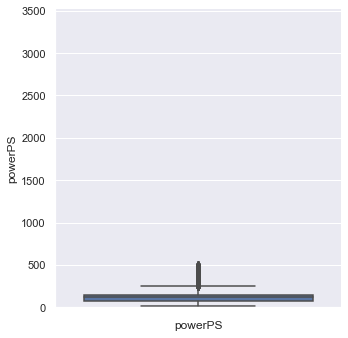

In [31]:
#powerPS
sns.displot(cars['powerPS'])
sns.boxplot(y=cars["powerPS"])

<AxesSubplot:xlabel='Age', ylabel='price'>

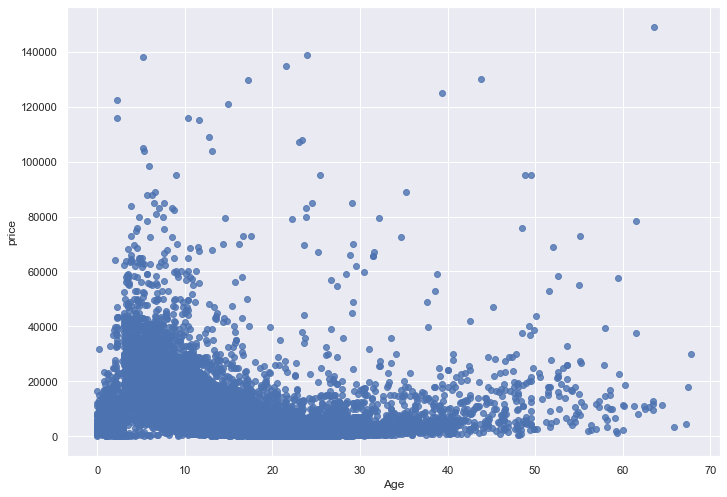

In [32]:
#age vs price
sns.regplot(x="Age",y="price",scatter=True,
          fit_reg=False,data=cars)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

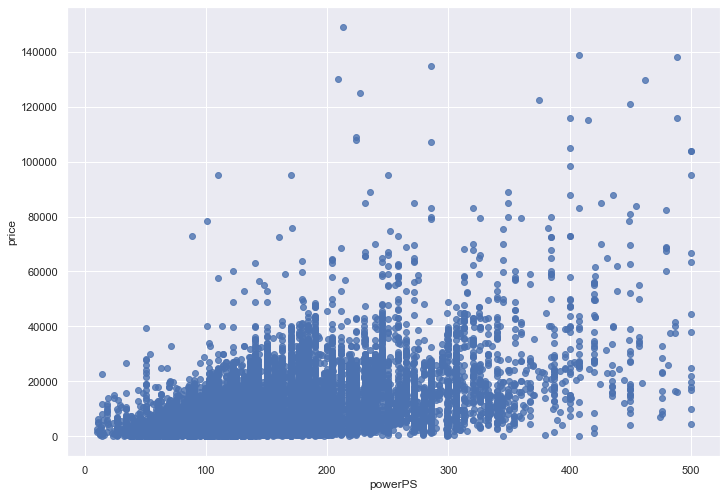

In [33]:
#powerPS vs price
sns.regplot(x="powerPS",y="price",scatter=True,
          fit_reg=False,data=cars)

<AxesSubplot:xlabel='seller', ylabel='count'>

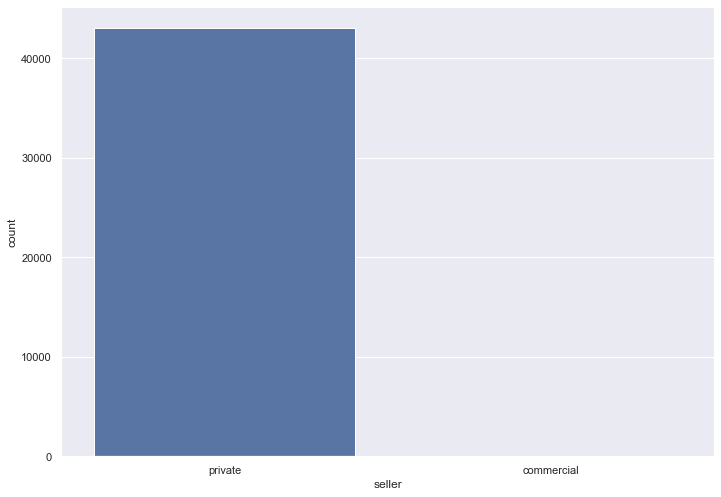

In [34]:
#variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=cars)

<AxesSubplot:xlabel='offerType', ylabel='count'>

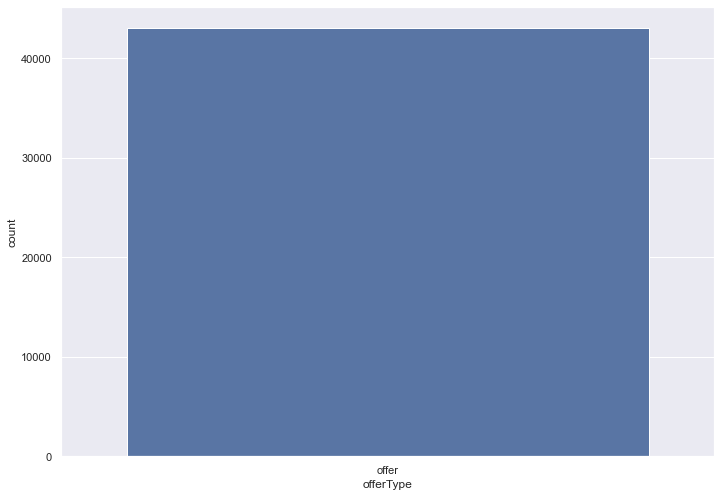

In [35]:
#variable offertype
cars["offerType"].value_counts()
sns.countplot(x='offerType',data=cars)


<AxesSubplot:xlabel='abtest', ylabel='count'>

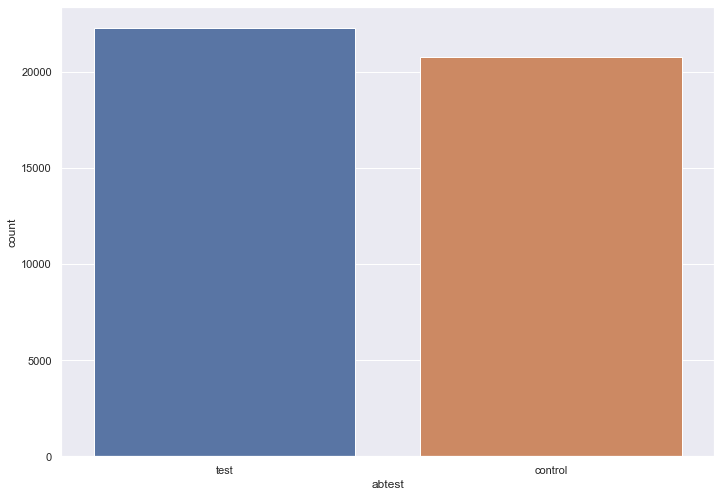

In [36]:
#variable abset
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x='abtest',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

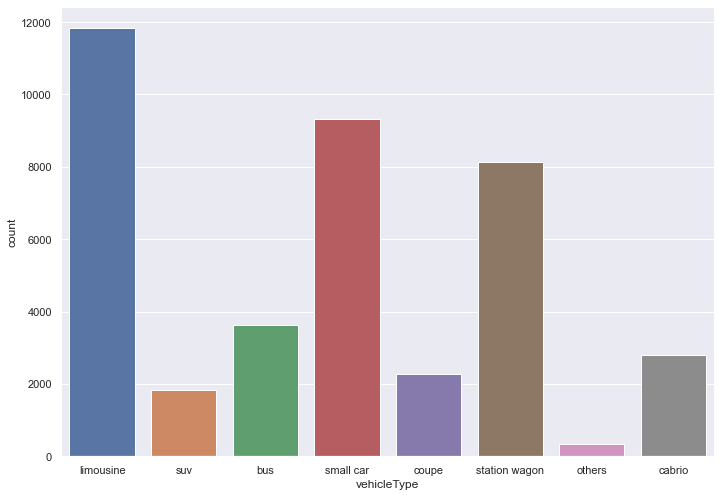

In [37]:
#variable vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x="vehicleType",data=cars)


<AxesSubplot:xlabel='vehicleType', ylabel='price'>

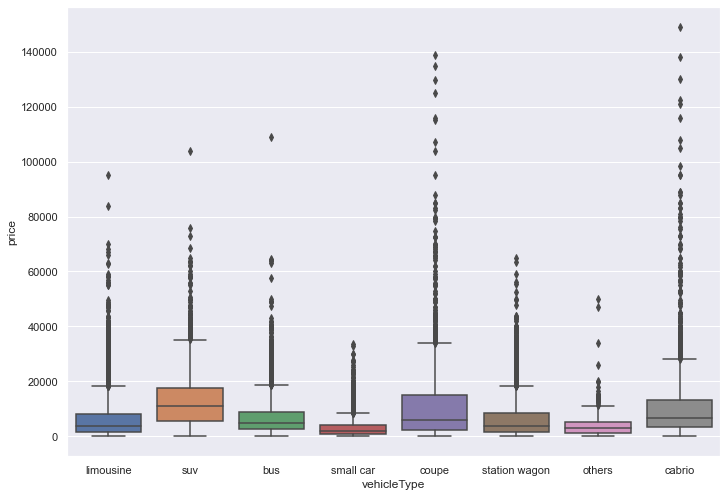

In [38]:
sns.boxplot(x='vehicleType',y='price',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='count'>

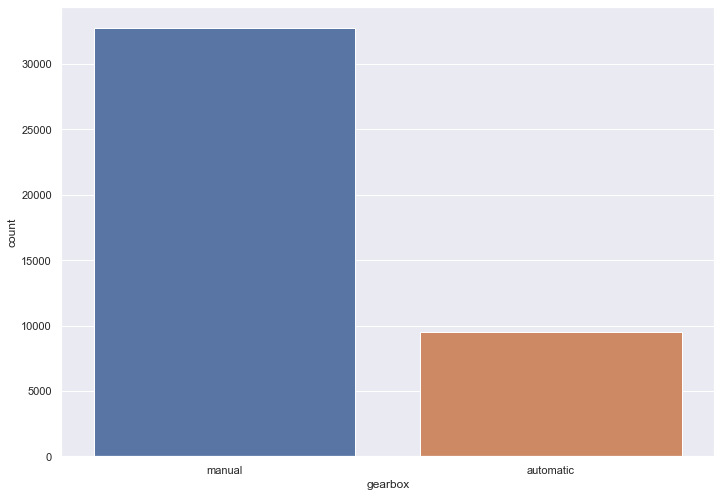

In [39]:
# variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x="gearbox",data=cars)


<AxesSubplot:xlabel='gearbox', ylabel='price'>

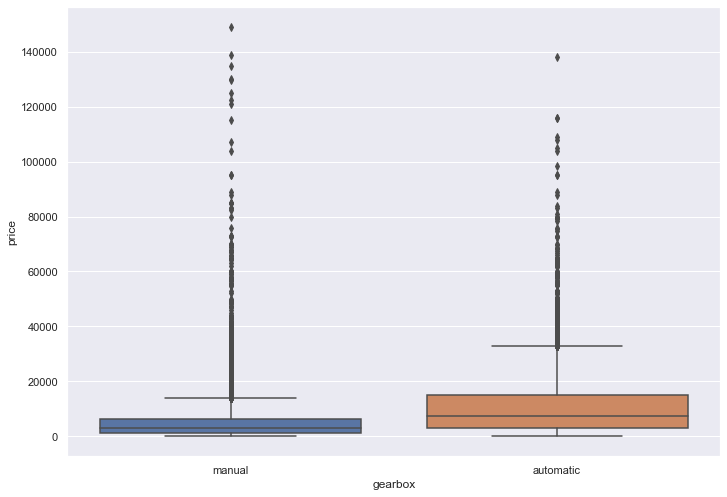

In [40]:
sns.boxplot(x='gearbox',y='price',data=cars)

<AxesSubplot:xlabel='model', ylabel='count'>

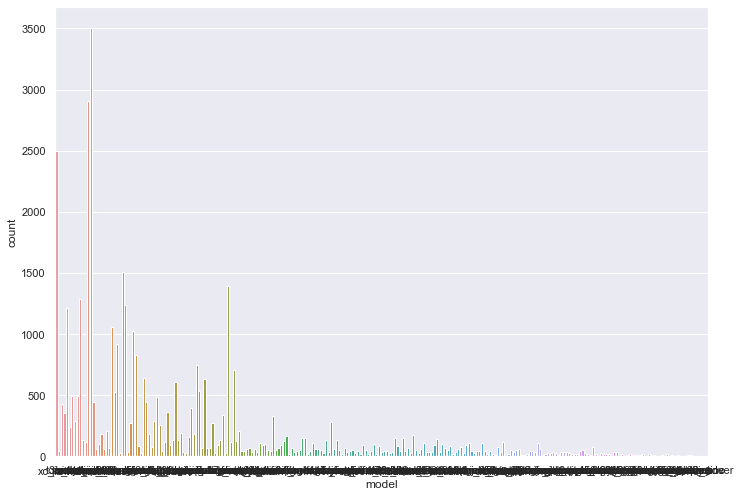

In [41]:
#variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x="model",data=cars)


<AxesSubplot:xlabel='kilometer', ylabel='price'>

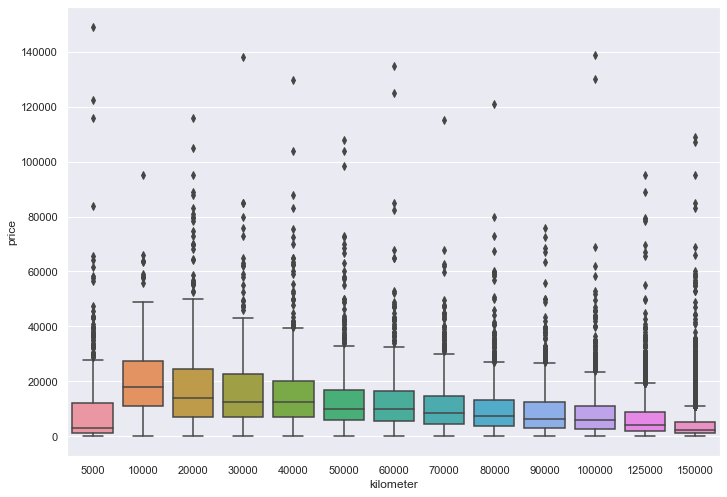

In [42]:
# variable kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x='kilometer',y='price',data=cars)


C:\Users\NIHAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kilometer', ylabel='price'>

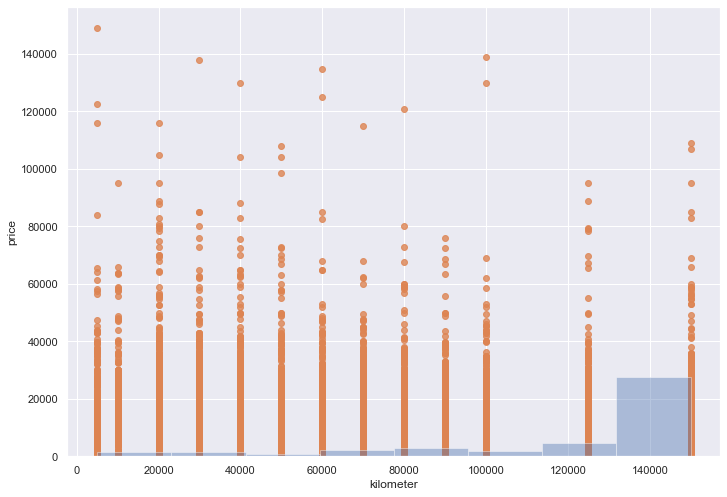

In [43]:
cars['kilometer'].describe()
sns.distplot(cars['kilometer'],bins=8,kde=False)
sns.regplot(x="kilometer",y="price",scatter=True,
          fit_reg=False,data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

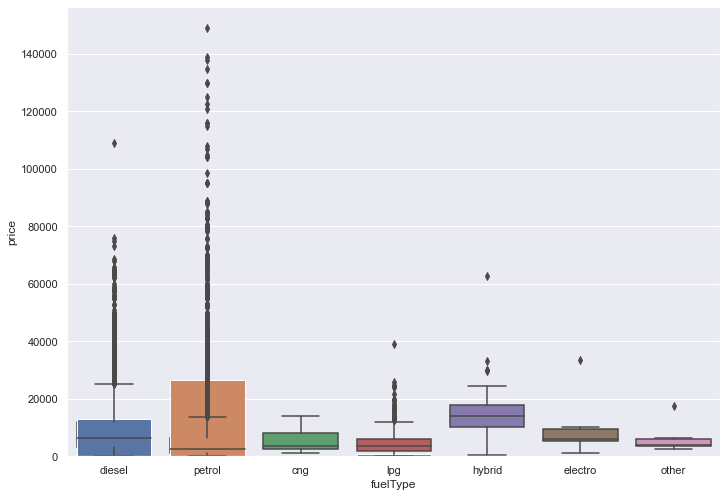

In [44]:
# variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x="fuelType",data=cars)
sns.boxplot(x='fuelType',y='price',data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

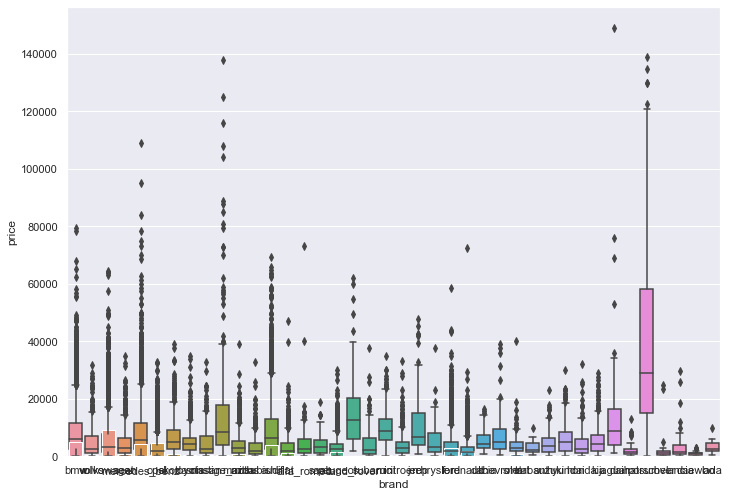

In [45]:
# variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x="brand",data=cars)
sns.boxplot(x='brand',y='price',data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

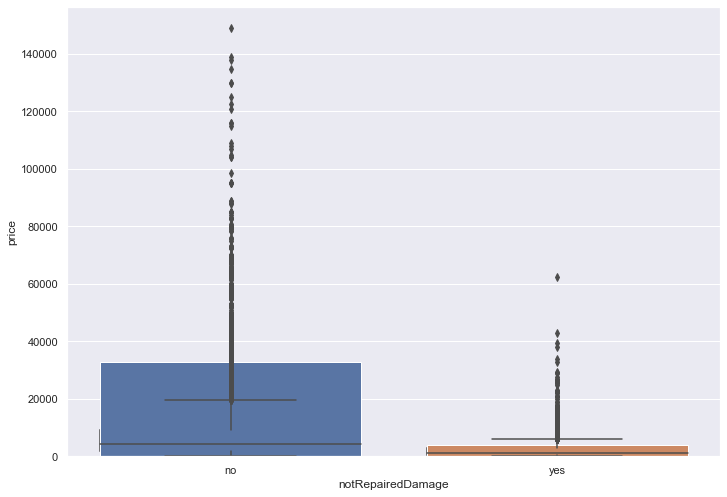

In [46]:
# variable notRepairedDamage
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x="notRepairedDamage",data=cars)
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

In [47]:
#Removing insignificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)
cars_copy=cars.copy()

In [48]:
#correlation 
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]
 


powerPS      0.575786
kilometer    0.440454
Age          0.336793
Name: price, dtype: float64

In [49]:
"""
we are going to build a linear regressio model and random forest model 
on two sets of data 
data obtain by omitting rows with missing value 
data obtain by imputing the missing values 
"""

'\nwe are going to build a linear regressio model and random forest model \non two sets of data \ndata obtain by omitting rows with missing value \ndata obtain by imputing the missing values \n'

In [50]:
#omitting missing values
cars_omit=cars.dropna(axis=0)

In [51]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [52]:
# importing necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [53]:
# separating input and output feature 
x1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1=cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

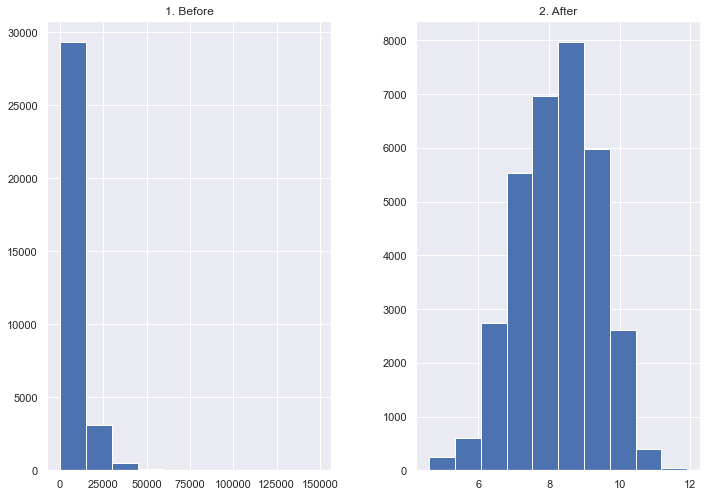

In [54]:
prices=pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})
prices.hist()

In [55]:
# transforming value into a logarithamic value
y1=np.log(y1)

In [56]:
#Splitting data into test train
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(23172, 366) (9932, 366) (23172,) (9932,)


In [57]:
#Baseline model for omitter data
#finding the mean for test data value
base_pred=np.mean(Y_test)
print(base_pred)
base_pred=np.repeat(base_pred,len(Y_test))
base_root_mean_square_error=np.sqrt(mean_squared_error(Y_test,base_pred))
print(base_root_mean_square_error)



8.270743539184746
1.1166178232729265


In [58]:
#Linear reg with omitted data
lgr=LinearRegression(fit_intercept=True)

In [59]:
model_lin1=lgr.fit(X_train,Y_train)

In [60]:
cars_predictions_lin1=lgr.predict(X_test)

In [61]:
#Computing MSE RMSE
lin_rmse1=np.sqrt(mean_squared_error(Y_test,cars_predictions_lin1))
print(lin_rmse1)

0.5295462071971693


In [62]:
r2_lin_test1=model_lin1.score(X_test,Y_test)
print(r2_lin_test1)
r2_lin_train1=model_lin1.score(X_train,Y_train)
print(r2_lin_train1)

0.7750952581054533
0.777137300292595


<AxesSubplot:ylabel='price'>

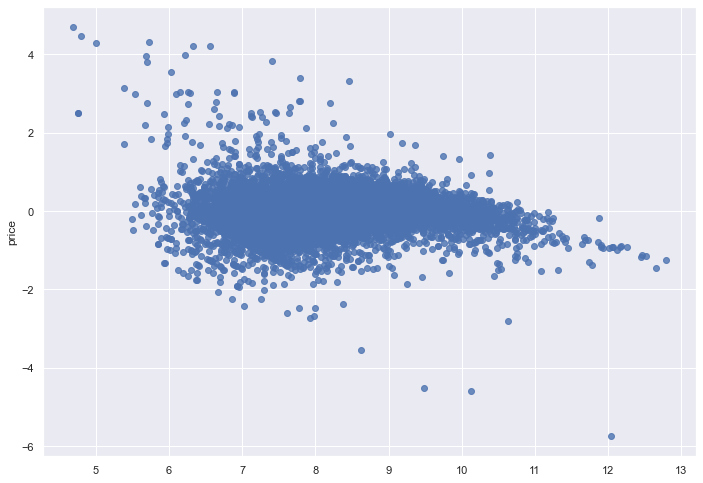

In [63]:
residuals1=Y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1 , y=residuals1,scatter=True,
                fit_reg=False)

In [64]:
residuals1.describe()

count    9932.000000
mean        0.019539
std         0.529212
min        -5.737623
25%        -0.239629
50%         0.045209
75%         0.299608
max         4.692796
Name: price, dtype: float64

# random forest with omitted data


In [67]:
#model parameters 
rf=RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [68]:
#Model
model_rf1=rf.fit(X_train,Y_train)


In [69]:
#predicting model on the test set
cars_prediction_rf1=rf.predict(X_test)

In [71]:
rf_mse1 = mean_squared_error(Y_test,cars_prediction_rf1)
rf_rmse1=np.sqrt(rf_mse1)
print(rf_mse1)

0.1709983898338465


In [72]:
r2_lin_test1=model_rf1.score(X_test,Y_test)
print(r2_lin_test1)
r2_lin_train1=model_rf1.score(X_train,Y_train)
print(r2_lin_train1)

0.8628540745042579
0.9189916441156671


# Model building with imputed data

In [77]:
cars_imputed=cars.apply(lambda x:x.fillna(x.median())\
                       if x.dtype=='float' else\
                       x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
dateCreated          0
Age                  0
dtype: int64

In [79]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [81]:
# regression
x2=cars_imputed.drop(['price'],axis='columns',inplace=False)
y2=cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

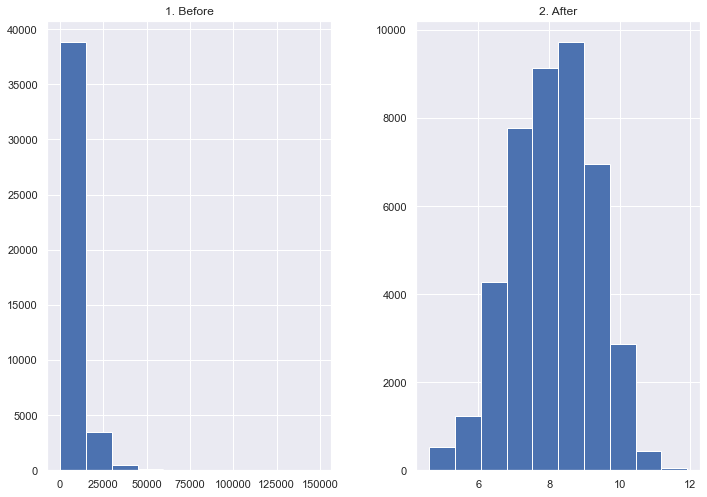

In [82]:
prices=pd.DataFrame({"1. Before":y2,"2. After":np.log(y2)})
prices.hist()

In [83]:
# transforming value into a logarithamic value
y2=np.log(y2)

In [84]:
# splitting data into train and test
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x2,y2,test_size=0.3,random_state=3)
print(X_train1.shape,X_test1.shape,Y_train1.shape,Y_test1.shape)

(30112, 375) (12906, 375) (30112,) (12906,)


In [85]:
#Baseline model for imputed data
#finding the mean for test data value
base_pred=np.mean(Y_test1)
print(base_pred)
base_pred=np.repeat(base_pred,len(Y_test1))
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(Y_test1,base_pred))
print(base_root_mean_square_error_imputed)



8.093586594724608
1.1778633862507188


In [87]:
#Linear reg with imputed data
lgr2=LinearRegression(fit_intercept=True)

In [88]:
model_lin2=lgr2.fit(X_train1,Y_train1)

In [89]:
cars_predictions_lin2=lgr2.predict(X_test1)

In [90]:
#Computing MSE RMSE
lin_rmse2=np.sqrt(mean_squared_error(Y_test1,cars_predictions_lin2))
print(lin_rmse2)

0.6383763872752781


In [91]:
r2_lin_test2=lgr2.score(X_test1,Y_test1)
print(r2_lin_test2)
r2_lin_train2=lgr2.score(X_train1,Y_train1)
print(r2_lin_train2)

0.7062595300935781
0.706530726939883


In [93]:
# random forest model for imputed data
rf2=RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [94]:
#Model
model_rf2=rf2.fit(X_train1,Y_train1)

In [95]:
cars_prediction_rf2=rf2.predict(X_test1)

In [96]:
rf_mse2 = mean_squared_error(Y_test1,cars_prediction_rf2)
rf_rmse2=np.sqrt(rf_mse1)
print(rf_mse1)

0.1709983898338465


In [97]:
r2_lin_test2=model_rf2.score(X_test1,Y_test1)
print(r2_lin_test2)
r2_lin_train2=model_rf2.score(X_train1,Y_train1)
print(r2_lin_train2)

0.8305333074091513
0.9043224139051717
